# Radiolabelling plot generator 

Produces pointplot of results from radiolabelling experiments.

In [1]:
%matplotlib inline
#import visualising_data_functions as vdf
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import math as maths

sns.set(style="white", color_codes=True)
sns.set_context('poster', font_scale = 1)
sns.set_palette('colorblind') #sns colormap for graph


plt.rcParams['svg.fonttype'] = 'none'

Define Functions:
- ttest:
    for performing pairwise ttests for two samples

In [2]:
def ttest(sample0, sample1, days, df):
    group0 = df[df.condition == sample0]
    group0_day = group0[group0.day == days]
    group0_days = group0_day['Activity'].values
    group1 = df[df.condition == sample1]
    group1_day = group1[group1.day == days]
    group1_days = group1_day['Activity'].values
    
    return stats.ttest_ind(group0_days, group1_days)[1] 

# Plot

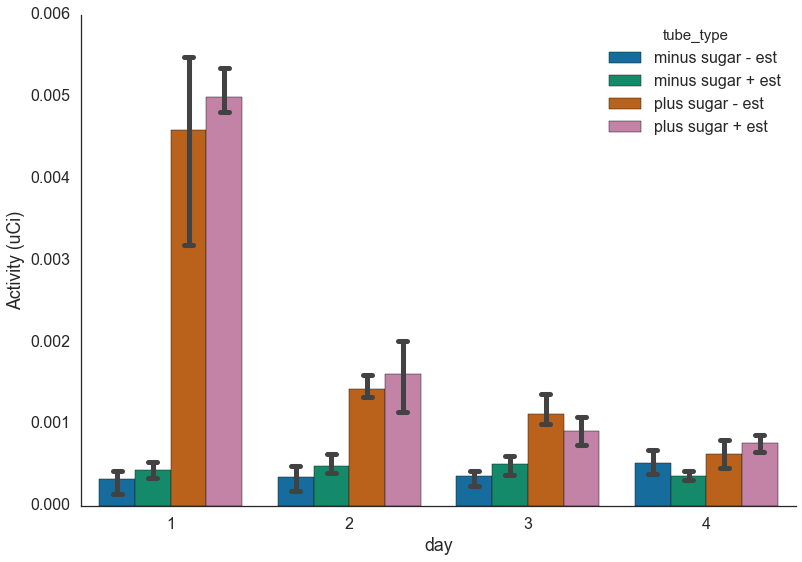

In [3]:
## open spreadsheet, extract database and sort by leaf condition


filename = 'radiolabelling_exp_7_8_17.xlsx'

dfAll = pd.read_excel(open(filename,'rb'), sheetname='active tubes') #make df from spreadsheet
dfAll = dfAll.fillna(float(0)) #replace 'None' cells with 0


sns.barplot(x = dfAll['day'], y=dfAll['Activity'], hue=dfAll['tube_type'], capsize = 0.05)
#plt.title('SPCH CO2 evolution- with and without sugar')
plt.ylabel('Activity (uCi)')
sns.despine()
plt.savefig('radiolabelling_spch_4day.svg')

    

# MUTE plot

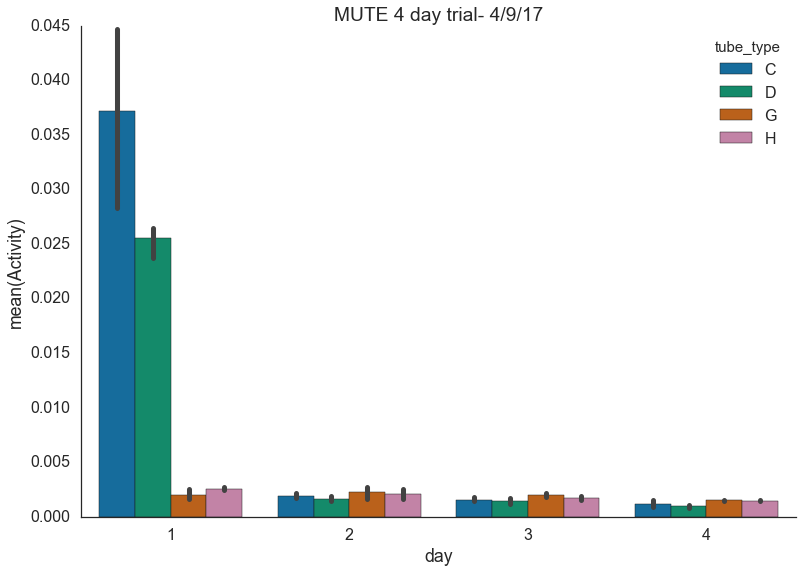

In [5]:
filename1 = 'radiolabelling_exp_4_9_17.xlsx'

dfAll = pd.read_excel(open(filename1,'rb'), sheetname='active tubes') #make df from spreadsheet
dfAll = dfAll.fillna(float(0)) #replace 'None' cells with 0

sns.barplot(x = dfAll['day'], y=dfAll['Activity'], hue=dfAll['tube_type'])
plt.title('MUTE 4 day trial- 4/9/17')
sns.despine()

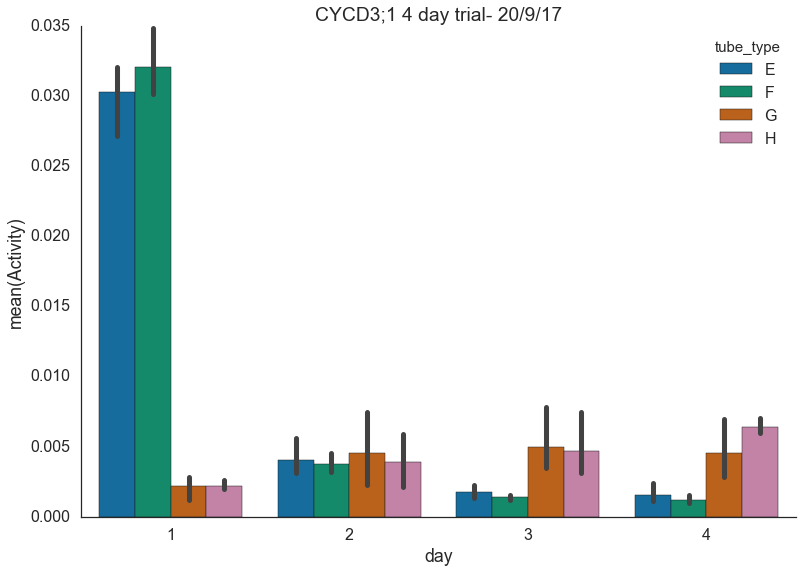

In [7]:
filename2 = 'radiolabelling_exp_20_9_17.xlsx'

dfAll = pd.read_excel(open(filename2,'rb'), sheetname='active tubes') #make df from spreadsheet
dfAll = dfAll.fillna(float(0)) #replace 'None' cells with 0

sns.barplot(x = dfAll['day'], y=dfAll['Activity'], hue=dfAll['tube_type'])
plt.title('CYCD3;1 4 day trial- 20/9/17')
sns.despine()

In [8]:
filename3 = 'radiolabelling_exp_10_10_17.xlsx'

dfAll_spch = pd.read_excel(open(filename3,'rb'), sheetname='active tubes') #make df from spreadsheet
dfAll_spch = dfAll_spch.fillna(float(0)) #replace 'None' cells with 0

dfAll_spch = dfAll_spch[(dfAll_spch.sugar == 'plus')]


day1 = ttest('plus sugar minus est', 'plus sugar plus est', 1, dfAll_spch)

day2 = ttest('plus sugar minus est', 'plus sugar plus est', 2, dfAll_spch)

spch_ttsest = ['SPCH', day1, day2]

avg_dict = {}
for i in dfAll_spch['condition'].unique():
    for t in dfAll_spch['day']:

        avg = dfAll_spch[(dfAll_spch.condition == i )&(dfAll_spch.day == t)]
        avg = np.asarray(avg['Activity'])
        avg = np.mean(avg)
        avg_dict[i, t] = avg
avg_dict

{('plus sugar minus est', 1): 0.0081722222222222213,
 ('plus sugar minus est', 2): 0.0045683183183183188,
 ('plus sugar plus est', 1): 0.024377477477477479,
 ('plus sugar plus est', 2): 0.0072786786786786786}

In [9]:
filename4 = 'radiolabelling_exp_23_10_17.xlsx'

dfAll_mute = pd.read_excel(open(filename4,'rb'), sheetname='active tubes') #make df from spreadsheet
dfAll_mute = dfAll_mute.fillna(float(0)) #replace 'None' cells with 0

dfAll_mute = dfAll_mute[(dfAll_mute.sugar == 'plus')]


day1 = ttest('plus sugar minus est', 'plus sugar plus est', 1, dfAll_mute)

day2 = ttest('plus sugar minus est', 'plus sugar plus est', 2, dfAll_mute)

mute_ttsest = ['MUTE', day1, day2]


avg_dict = {}
for i in dfAll_mute['condition'].unique():
    for t in dfAll_mute['day']:

        avg = dfAll_mute[(dfAll_mute.condition == i )&(dfAll_mute.day == t)]
        avg = np.asarray(avg['Activity'])
        avg = np.mean(avg)
        avg_dict[i, t] = avg
avg_dict

{('plus sugar minus est', 1): 0.01581171171171171,
 ('plus sugar minus est', 2): 0.010754504504504506,
 ('plus sugar plus est', 1): 0.010000900900900901,
 ('plus sugar plus est', 2): 0.0057382882882882876}

In [10]:
filename5 = 'radiolabelling_exp_20_11_17.xlsx'

dfAll_spch1 = pd.read_excel(open(filename5,'rb'), sheetname='active tubes') #make df from spreadsheet
#dfAll_spch1 = dfAll_spch1.fillna(float(0)) #replace 'None' cells with 0



In [11]:
filename6 = 'radiolabelling_exp_24_11_17.xlsx'

dfAll_fama = pd.read_excel(open(filename6,'rb'), sheetname='Sheet1') #make df from spreadsheet
dfAll_fama = dfAll_fama.fillna(float(0)) #replace 'None' cells with 0

day1 = ttest('plus sugar minus est', 'plus sugar plus est', 1, dfAll_fama)

day2 = ttest('plus sugar minus est', 'plus sugar plus est', 2, dfAll_fama)

fama_ttsest = ['FAMA', day1, day2]

avg_dict = {}
for i in dfAll_fama['condition'].unique():
    for t in dfAll_fama['day']:

        avg = dfAll_fama[(dfAll_fama.condition == i )&(dfAll_fama.day == t)]
        avg = np.asarray(avg['Activity'])
        avg = np.mean(avg)
        avg_dict[i, t] = avg
avg_dict

{('plus sugar minus est', 1): 0.020310810810810809,
 ('plus sugar minus est', 2): 0.012914414414414413,
 ('plus sugar plus est', 1): 0.017545945945945947,
 ('plus sugar plus est', 2): 0.01559662162162162}

In [12]:
filename = 'radiolabelling_exp_27_11_17.xlsx'

dfAll = pd.read_excel(open(filename,'rb'), sheetname='active tubes') #make df from spreadsheet
dfAll = dfAll.fillna(float(0)) #replace 'None' cells with 0
dfAll = dfAll[(dfAll.sugar == 'plus')]


#day1 = ttest('plus_sugar_minus_est', 'plus_sugar_plus_est', 1, dfAll)

#day2 = ttest('plus_sugar_minus_est', 'plus_sugar_plus_est', 2, dfAll)

#print(day1, day2)

In [13]:
filename = 'radiolabelling_exp_4_12_17.xlsx'

dfAll_krp1 = pd.read_excel(open(filename,'rb'), sheetname='active tubes') #make df from spreadsheet
dfAll_krp1 = dfAll_krp1.fillna(float(0)) #replace 'None' cells with 0

day1 = ttest('plus sugar minus est', 'plus sugar plus est', 1, dfAll_krp1)

day2 = ttest('plus sugar minus est', 'plus sugar plus est', 2, dfAll_krp1)

krp1_ttest = ['KRP1', day1, day2]

avg_dict = {}
for i in dfAll_krp1['condition'].unique():
    for t in dfAll_krp1['day']:

        avg = dfAll_krp1[(dfAll_krp1.condition == i )&(dfAll_krp1.day == t)]
        avg = np.asarray(avg['Activity'])
        avg = np.mean(avg)
        avg_dict[i, t] = avg
avg_dict

{('plus sugar minus est', 1): 0.023493468468468469,
 ('plus sugar minus est', 2): 0.0037213213213213212,
 ('plus sugar plus est', 1): 0.029212762762762762,
 ('plus sugar plus est', 2): 0.0043084084084084083}

['cycd3', 0.019746700879114544, 0.22646028150139516]


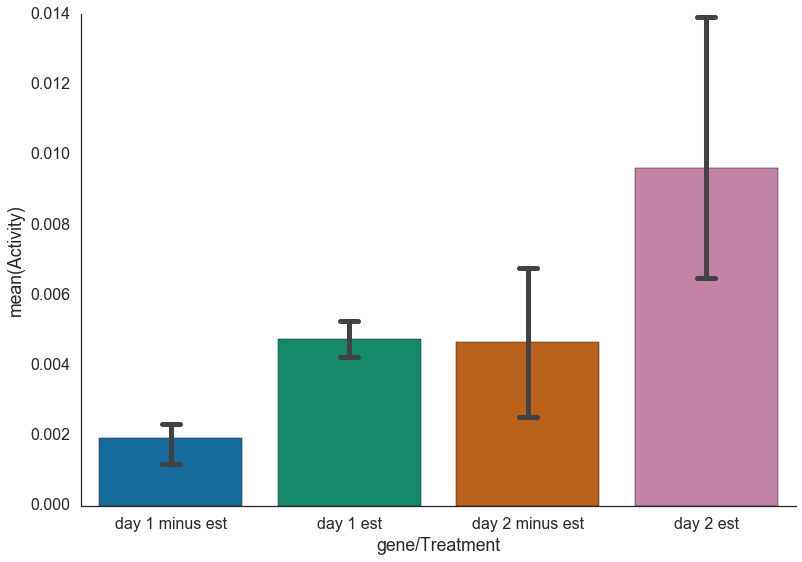

In [14]:
filename = 'radiolabelling_exp_24_8_18.xlsx'
order = ['day 1 minus est', 'day 1 est',
        'day 2 minus est', 'day 2 est']

dfAll_cycd3 = pd.read_excel(open(filename,'rb'), sheetname='active tubes') #make df from spreadsheet
dfAll_cycd3 = dfAll_cycd3.fillna(float(0)) #replace 'None' cells with 0

day1 = ttest('plus sugar minus est', 'plus sugar plus est', 1, dfAll_cycd3)

day2 = ttest('plus sugar minus est', 'plus sugar plus est', 2, dfAll_cycd3)

cycd3_ttest = ['cycd3', day1, day2]

avg_dict = {}
for i in dfAll_cycd3['condition'].unique():
    for t in dfAll_cycd3['day']:

        avg = dfAll_cycd3[(dfAll_cycd3.condition == i )&(dfAll_cycd3.day == t)]
        avg = np.asarray(avg['Activity'])
        avg = np.mean(avg)
        avg_dict[i, t] = avg
cycd3_ttest, avg_dict
length = len(dfAll_cycd3['Activity'])
dfAll_cycd3['condition'] = dfAll_cycd3['condition'].map(lambda x: x.lstrip('plus sugar'))
dfAll_cycd3['gene/Treatment'] = 'day '+dfAll_cycd3['day'].map(str) +' ' + dfAll_cycd3['condition']
sns.barplot(x =dfAll_cycd3['gene/Treatment'], y=dfAll_cycd3['Activity'], 
                capsize = 0.1, order = order)
sns.despine()
plt.savefig('cycd3_result.png')

print(cycd3_ttest)

In [15]:
filename = 'radiolabelling_exp_7_12_17.xlsx'

dfAll_yda = pd.read_excel(open(filename,'rb'), sheetname='active tubes') #make df from spreadsheet
dfAll_yda = dfAll_yda.fillna(float(0)) #replace 'None' cells with 0

day1 = ttest('plus sugar minus est', 'plus sugar plus est', 1, dfAll_yda)

day2 = ttest('plus sugar minus est', 'plus sugar plus est', 2, dfAll_yda)

yda_ttest = ['YDA', day1, day2]

avg_dict = {}
for i in dfAll_yda['condition'].unique():
    for t in dfAll_yda['day']:

        avg = dfAll_yda[(dfAll_yda.condition == i )&(dfAll_yda.day == t)]
        avg = np.asarray(avg['Activity'])
        avg = np.mean(avg)
        avg_dict[i, t] = avg
avg_dict

{('plus sugar minus est', 1): 0.004429429429429429,
 ('plus sugar minus est', 2): 0.0040870870870870863,
 ('plus sugar plus est', 1): 0.0022762762762762764,
 ('plus sugar plus est', 2): 0.0023108108108108108}

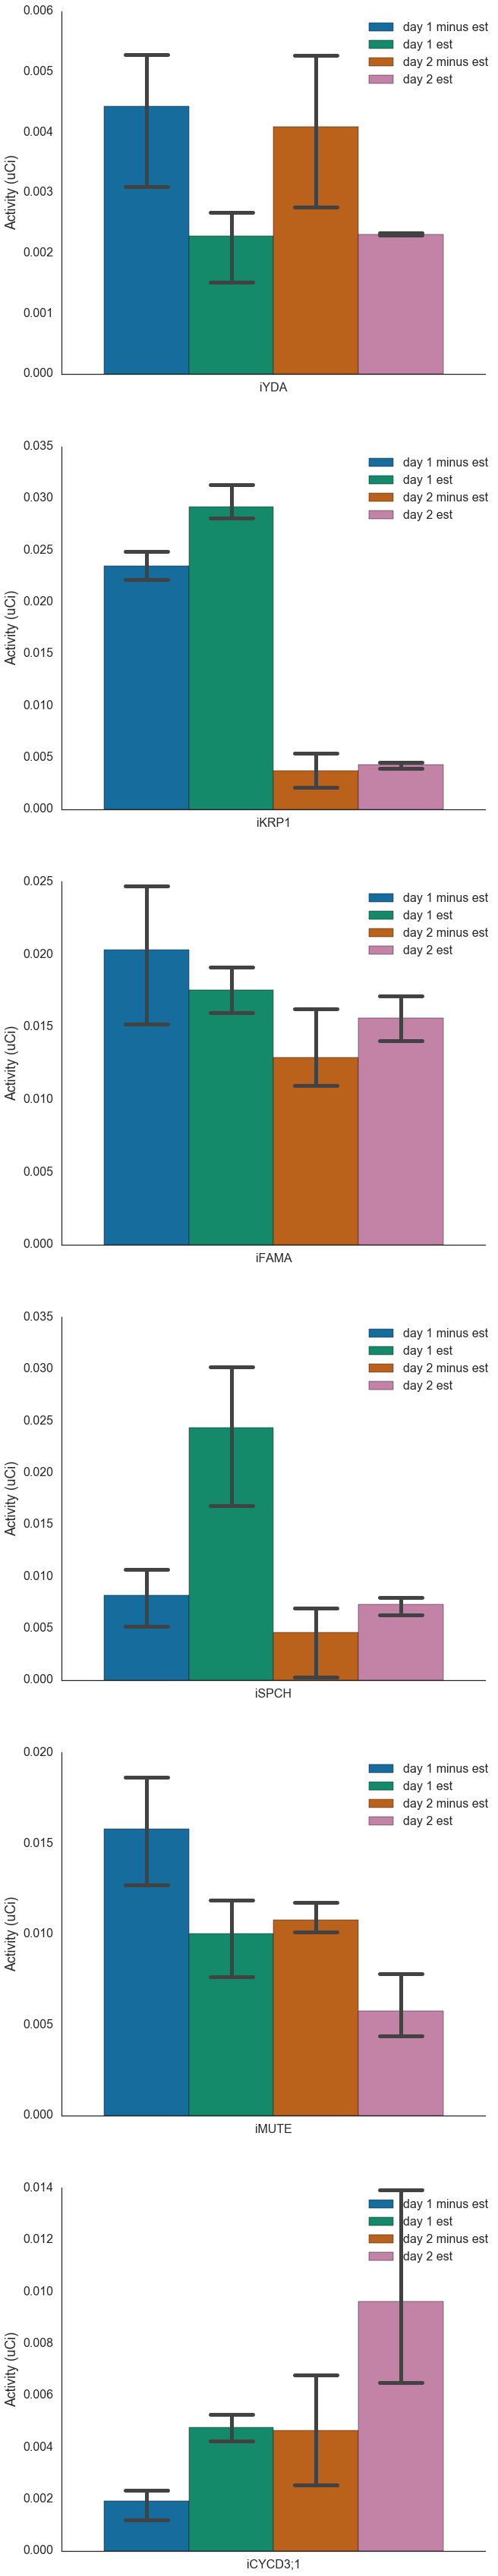

In [16]:
dataframes = [dfAll_yda, dfAll_krp1, dfAll_fama, dfAll_spch, dfAll_mute, dfAll_cycd3]
genotypes = ['iYDA', 'iKRP1', 'iFAMA', 'iSPCH', 'iMUTE', 'iCYCD3;1']
order = ['day 1 minus est', 'day 1 est',
        'day 2 minus est', 'day 2 est']

f, axes = plt.subplots(6,1, figsize=(10, 60))

axval = 0

for index in range(len(dataframes)):
    dataframe = dataframes[index]
    length = len(dataframe['Activity'])
    dataframe['condition'] = dataframe['condition'].map(lambda x: x.lstrip('plus sugar'))
    dataframe['genotype'] = [genotypes[index] for i in range(length)] 
    dataframe['gene/Treatment'] = 'day '+dataframe['day'].map(str) +' ' + dataframe['condition']
    sns.barplot(x = dataframe['genotype'], y=dataframe['Activity'], hue=dataframe['gene/Treatment'], 
                capsize = 0.1, hue_order=order, ax = axes[axval])
    axes[axval].legend(bbox_to_anchor=(.70, 1), loc=2)
    axes[axval].set_ylabel('Activity (uCi)')
    axes[axval].set_xlabel('')
    axval += 1





#plt.xticks(rotation=45)
#plt.title('14CO2 evolution in presence of inducer vs mock treatment')
plt.rcParams['svg.fonttype'] = 'none'
sns.despine()
plt.savefig('radiolabelling_results.svg')

{('est added at 24h', 6): 0.0014226733333333333,
 ('est added at 24h', 24): 0.0047361866666666671,
 ('est added at 24h', 30): 0.0012055566666666665,
 ('est added at 24h', 48): 0.0038382866666666661,
 ('minus est', 6): 0.00082447666666666663,
 ('minus est', 24): 0.00477087,
 ('minus est', 30): 0.0018887366666666665,
 ('minus est', 48): 0.0036486466666666669,
 ('plus est', 6): 0.00084233999999999991,
 ('plus est', 24): 0.0033519499999999998,
 ('plus est', 30): 0.0010466966666666667,
 ('plus est', 48): 0.0026570566666666664}

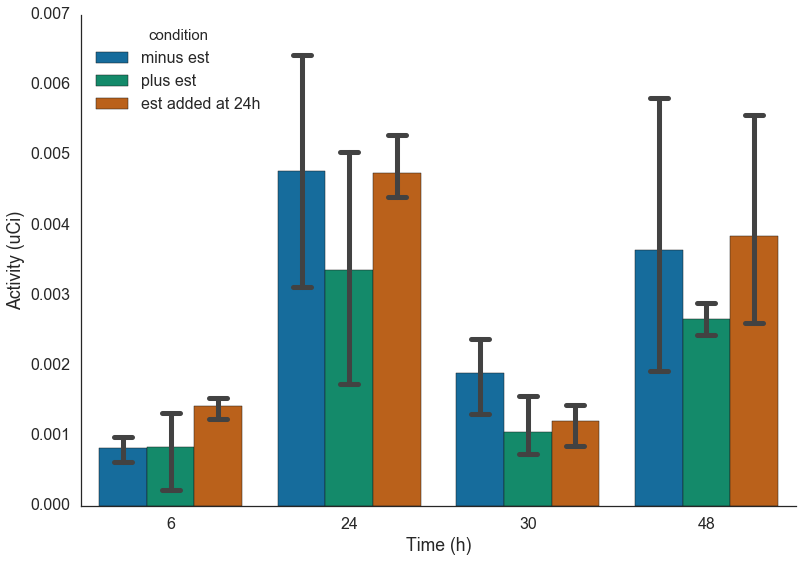

In [17]:
filename = 'col0_trial.xlsx'

dfAll_int = pd.read_excel(open(filename,'rb'), sheetname='Sheet1') #make df from spreadsheet
dfAll_int = dfAll_int.fillna(float(0)) #replace 'None' cells with 0

sns.barplot(x = dfAll_int['hour'], y=dfAll_int['Activity'], hue=dfAll_int['condition'],capsize = 0.1)
plt.ylabel('Activity (uCi)')
plt.xlabel('Time (h)')
sns.despine()
plt.savefig('col0_trial.svg', transparent = True)

hours = [6, 24, 30, 48]
conditions = list(dfAll_int.condition.unique())
comparisons = list(combinations(conditions, 2))
ttest_dict = {}

for comparison in comparisons:
    sample0 = comparison[0]
    sample1 = comparison[1]
    results_array = np.zeros(len(hours))
    for i in range(len(hours)):
        hour = hours[i]
        group0 = dfAll_int[dfAll_int.condition == sample0]
        group0_day = group0[group0.hour == hour]
        group0_days = group0_day['Activity'].values
        group1 = dfAll_int[dfAll_int.condition == sample1]
        group1_day = group1[group1.hour == hour]
        group1_days = group1_day['Activity'].values
        result = stats.ttest_ind(group0_days, group1_days)[1]
        results_array[i] = result

    ttest_dict[comparison] = results_array

int_ttests = pd.DataFrame.from_dict(ttest_dict, orient='index')

avg_dict = {}
for i in dfAll_int['condition'].unique():
    for t in dfAll_int['hour']:

        avg = dfAll_int[(dfAll_int.condition == i )&(dfAll_int.hour == t)]
        avg = np.asarray(avg['Activity'])
        avg = np.mean(avg)
        avg_dict[i, t] = avg
avg_dict

In [18]:
ttests = pd.DataFrame([spch_ttsest, mute_ttsest, fama_ttsest, krp1_ttest, yda_ttest, cycd3_ttest], columns = ['gene', 'day 1', 'day 2'])

In [19]:
ttests

,gene,day 1,day 2
0,SPCH,0.019178,0.289229
1,MUTE,0.142548,0.012729
2,FAMA,0.634972,0.352299
3,KRP1,0.042444,0.576045
4,YDA,0.058728,0.155912
5,cycd3,0.019747,0.226460


In [20]:
int_ttests

,0,1,2,3
"(minus est, est added at 24h)",0.013678,0.973870,0.131828,0.902236
"(minus est, plus est)",0.960952,0.352726,0.108545,0.436984
"(plus est, est added at 24h)",0.161455,0.236281,0.642072,0.260734


# qPCR results plotter

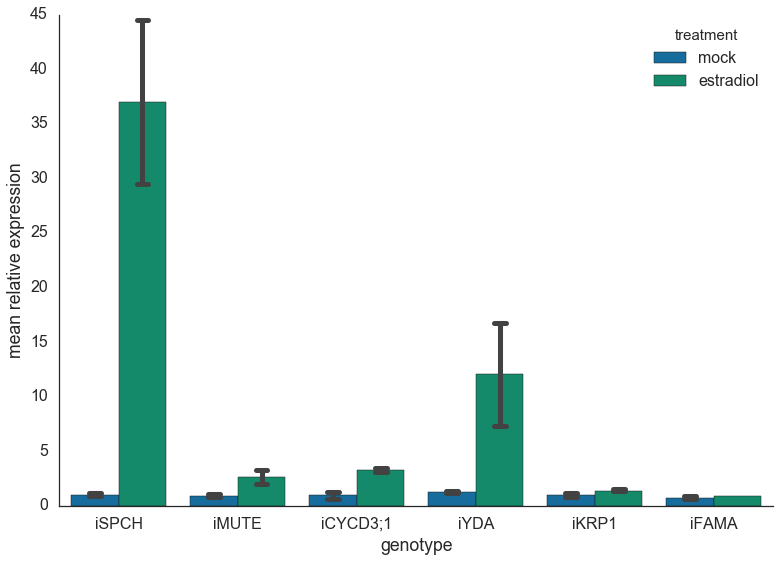

In [21]:
krp1_minus_est = np.asarray([1.130,0.816,1.055])
krp1_plus_est = np.asarray([1.481,1.282,1.341])
spch_plus_est = np.asarray([29.512, 44.541])
spch_minus_est = np.asarray([0.874, 0.959, 1.1679])
CYCD3_minus_est = np.asarray([1.227, 0.567, 1.207])
CYCD3_plus_est = np.asarray([3.038, 3.405])
fama_minus_est = np.asarray([0.855, 1.517, 0.628])
fama_plus_est = np.asarray([0.898, 0.400])
mute_minus_est = np.asarray([1.051,0.776,1.173])
mute_plus_est = np.asarray([1.938, 3.247,2.439])
yda_minus_est = np.asarray([1.145,1.297,0.558])
yda_plus_est = np.asarray([7.329,16.750])


pcr_df = pd.DataFrame([['iSPCH', spch_minus_est[0], 'mock'],['iSPCH', spch_plus_est[0], 'estradiol'],
                      ['iMUTE', mute_minus_est[0], 'mock'],['iMUTE', mute_plus_est[0], 'estradiol'],
                      ['iCYCD3;1', CYCD3_minus_est[0], 'mock'],['iCYCD3;1', CYCD3_plus_est[0], 'estradiol'],
                      ['iYDA', yda_minus_est[0], 'mock'],['iYDA', yda_plus_est[0], 'estradiol'],
                       ['iKRP1', krp1_minus_est[0], 'mock'],['iKRP1', krp1_plus_est[0], 'estradiol'],
                       ['iFAMA', fama_minus_est[0], 'mock'],['iFAMA', fama_plus_est[0], 'estradiol'],
                      ['iSPCH', spch_minus_est[1], 'mock'],['iSPCH', spch_plus_est[1], 'estradiol'],
                      ['iMUTE', mute_minus_est[1], 'mock'],['iMUTE', mute_plus_est[1], 'estradiol'],
                       ['iYDA', yda_minus_est[1], 'mock'],['iYDA', yda_plus_est[1], 'estradiol'],
                       ['iKRP1', krp1_minus_est[1], 'mock'],['iKRP1', krp1_plus_est[1], 'estradiol'],
                      ['iCYCD3;1', CYCD3_minus_est[1], 'mock'],['iCYCD3;1', CYCD3_plus_est[1], 'estradiol'],
                      ['iFAMA', fama_minus_est[2], 'mock'],['iSPCH', spch_minus_est[2], 'mock'],
                       
                       ['iKRP1', krp1_minus_est[2], 'mock'],['iKRP1', krp1_plus_est[2], 'estradiol'],
                       ['iCYCD3;1', CYCD3_minus_est[2], 'mock'],['iFAMA', fama_minus_est[2], 'mock'],
                      ], 
                      columns = ['target gene', 'rel expression', 'treatment'] )
plus_df = pcr_df[pcr_df.treatment=='estradiol']
sns.barplot(x = pcr_df['target gene'], y=pcr_df['rel expression'], hue = pcr_df['treatment'],capsize = 0.1)
#plt.title('Relative Expression of Target Genes in Presence or Absence of Inducer'+'\n\n')
plt.ylabel('mean relative expression')
plt.xlabel('genotype')
plt.savefig('pcr_results.svg')
sns.despine()

In [22]:
mute_t = stats.ttest_ind(mute_minus_est, mute_plus_est)[1]

spch_t = stats.ttest_ind(spch_minus_est, spch_plus_est)[1]

cyc_t = stats.ttest_ind(CYCD3_minus_est, CYCD3_plus_est)[1]

fama_t = stats.ttest_ind(fama_minus_est, fama_plus_est)[1]

krp1_t = stats.ttest_ind(krp1_minus_est, krp1_plus_est)[1]

yda_t = stats.ttest_ind(yda_minus_est, yda_plus_est)[1]

t_results = pd.DataFrame([['SPCH', spch_t],['MUTE', mute_t],['CYCD3;1',cyc_t],['FAMA', fama_t],
                          ['KRP1', krp1_t],['YDA', yda_t]])

t_results

,0,1
0,SPCH,0.007623
1,MUTE,0.018099
2,CYCD3;1,0.005675
3,FAMA,0.435624
4,KRP1,0.030055
5,YDA,0.051923
